In [2]:
import pandas as pd
import numpy as np
import pyreadr
from sklearn.decomposition import PCA
import cmapPy.pandasGEXpress as pandasGEXpress
import cmapPy.pandasGEXpress.parse as cparse
#import cmapPy.pandasGEXpress.parse

from cmapPy.pandasGEXpress.write_gct import write
from cmapPy.pandasGEXpress import gctx2gct
from cmapPy.pandasGEXpress import*

from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from scipy.cluster.hierarchy import dendrogram, linkage


pd.set_option('display.max_columns', 37)

In [3]:
dox_100_clusters = pd.read_csv("all_mod_100_dox.tsv", sep = '\t')

In [20]:
raw_gene_exp = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/data_mrna_seq_v2_rsem.txt", sep = '\t')

In [21]:
raw_gene_exp = raw_gene_exp.dropna(axis = 0)

In [22]:
raw_gene_exp

,Hugo_Symbol,Entrez_Gene_Id,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SG-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,...,TCGA-S3-A6ZH-01,TCGA-S3-AA0Z-01,TCGA-S3-AA10-01,TCGA-S3-AA11-01,TCGA-S3-AA12-01,TCGA-S3-AA14-01,TCGA-S3-AA15-01,TCGA-S3-AA17-01,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
2,UBE2Q2P2,100134869,12.9316,17.3790,9.2294,11.0799,14.4298,13.6090,8.9958,14.3935,11.3241,4.4426,10.7401,4.3776,3.0048,2.9782,4.9419,28.8560,...,3.0139,34.7311,10.6295,29.0049,10.4263,23.2449,3.7363,9.1814,14.3720,10.8828,3.0792,14.3711,6.3091,3.2580,21.4409,27.2744,7.2933,24.7795
3,HMGB1P1,10357,52.1503,69.7553,154.2970,143.8640,84.2128,114.2570,107.5630,116.3870,60.2630,153.1450,141.1930,68.5843,79.8003,63.5491,134.8730,1119.1900,...,113.4210,140.1610,125.3000,76.7614,138.8980,94.8112,120.6860,61.8801,135.6240,136.1290,29.9974,128.3150,53.6278,42.2643,137.7760,64.1427,85.0461,167.5510
7,RNU12-2P,26823,0.0000,1.0875,0.0000,0.4137,0.4255,0.0000,0.5230,0.4505,0.3308,0.0000,0.0000,0.3600,0.0000,0.2943,0.3658,0.3152,...,0.3149,0.6852,0.4254,1.7770,0.9799,0.5635,0.6075,0.4337,0.0000,0.0000,0.6158,0.4746,0.0000,4.0725,2.7559,0.4724,0.5973,0.3480
8,SSX9P,280660,0.0000,0.5438,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7984,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
10,EZHIP,340602,1.7233,144.1000,0.0000,0.0000,0.4255,0.0000,0.0000,0.9010,0.6616,0.0000,0.0000,0.0000,0.0000,0.2943,0.0000,1.8910,...,0.0000,0.3426,0.8507,0.4442,0.0000,0.0000,1.8226,0.0000,0.0000,23.1548,0.0000,0.9492,4.7319,0.8145,2.7559,17.4776,0.0000,0.3480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,440590,258.4940,198.4770,331.8220,175.4240,14.0426,15.8381,2.0921,19.3716,33.0825,57.5895,94.6772,1.4400,19.8634,189.2290,51.2117,158.5250,...,143.2960,7.8794,131.4330,138.6050,14.6988,83.9635,55.2855,53.7786,73.8563,11.5774,40.0294,112.4820,46.5300,98.5543,21.2598,164.3840,51.9667,139.5390
20527,ZYG11B,79699,1208.3700,603.5890,532.1850,607.3650,775.7450,626.4850,321.6530,1364.5700,868.0840,960.5920,881.2260,702.7270,1353.2400,977.0450,1092.6400,1380.7100,...,674.5930,846.5230,377.2860,659.7070,618.8180,1021.0900,538.2750,637.9700,484.6570,559.3340,380.5880,533.9340,231.8610,315.2110,688.1890,746.8120,505.9280,573.4670
20528,ZYX,7791,3507.2500,5504.6200,5458.7500,5691.3500,4041.7000,4131.9800,3221.7600,6186.7300,3559.6700,3007.8200,5343.4800,2919.6300,5464.9600,4515.3000,3032.1000,591.2390,...,2521.6900,1948.2700,4073.1600,2629.9400,2905.9500,4993.8600,6276.4300,3352.9200,4163.5000,5594.0700,6453.3600,5550.5500,6675.8700,10937.1000,5118.1100,5477.5600,6675.6300,3402.5200
20529,ZZEF1,23140,1894.9300,1318.6500,942.8830,781.1340,831.9150,922.1290,1115.0600,1931.3000,1278.9700,926.3680,934.3480,1694.9000,1312.7900,1010.5900,958.3900,1798.9300,...,650.6570,1525.1800,1697.5800,2021.3200,1247.9300,2505.3800,1344.4700,1159.2800,1242.3800,538.3500,747.6270,970.1000,558.3600,800.6520,1933.8600,1437.4100,754.4130,564.4190


In [12]:
dox_100_clusters_99 = dox_100_clusters[dox_100_clusters['Cluster'] == 99]
dox_100_clusters_99_gene_names = dox_100_clusters_99.iloc[:,0] #52, 99

In [16]:
dox_100_clusters_99_gene_names

42           TROAP
50          CHAF1A
640           POLQ
648           PLK4
903         TOPBP1
933            CIT
981          WDHD1
1767          DNA2
2192          FEN1
2873          ORC6
2980         CENPI
3069        RAD54B
3884         ATAD2
4088        DONSON
4771         KIFC1
4773         KIF22
5077          MCM4
5080          MCM7
6073           DTL
6429        MIS18A
6456          POLE
6579         DDX56
6664        ERCC6L
6926          UBR7
6989         FANCI
7288         ASF1B
7294      C1orf112
8072         RAD9A
8077         RAD51
8128          RBL1
8175          RFC2
8176          RFC3
8178          RFC5
8382          RRM2
8774         GINS3
9870         AUNIP
9916         DSCC1
10094        CENPU
10185       SHCBP1
10262        MCMBP
10324         DSN1
10629         CDT1
10693       CHAF1B
10738         CDC7
10956        LMNB2
11523         SMC3
11536        CCNE2
11563         EXO1
12059        ESPL1
12125        PCLAF
12174    ARHGAP11A
12187        GINS1
12242       

In [17]:
raw_gene_exp['Hugo_Symbol']

0             NaN
1             NaN
2        UBE2Q2P2
3         HMGB1P1
4             NaN
           ...   
20526      ZYG11A
20527      ZYG11B
20528         ZYX
20529       ZZEF1
20530        ZZZ3
Name: Hugo_Symbol, Length: 20531, dtype: object

In [25]:
module = np.intersect1d(dox_100_clusters_99_gene_names, raw_gene_exp['Hugo_Symbol'])
module

array(['ARHGAP11A', 'ASF1B', 'ATAD2', 'C1orf112', 'CCNE2', 'CDC25A',
       'CDC25C', 'CDC6', 'CDC7', 'CDT1', 'CENPI', 'CHAF1A', 'CHAF1B',
       'CIT', 'DDX56', 'DNA2', 'DONSON', 'DSCC1', 'DSN1', 'DTL', 'ERCC6L',
       'ESPL1', 'EXO1', 'FANCI', 'FEN1', 'GINS1', 'GINS3', 'KIF22',
       'KIFC1', 'LMNB2', 'MCM4', 'MCM7', 'PLK4', 'POLE', 'POLQ', 'RAD51',
       'RAD54B', 'RAD9A', 'RBL1', 'RFC2', 'RFC3', 'RFC5', 'RRM2',
       'SHCBP1', 'SMC3', 'TOPBP1', 'TROAP', 'UBR7', 'WDHD1'], dtype=object)

In [33]:
raw_gene_exp.drop(columns = ['Entrez_Gene_Id'], inplace = True)


In [29]:
raw_gene_exp.set_index("Hugo_Symbol", drop = True, inplace = True)

In [6]:
def preProcessing1(df, threshold = 10):
    import pandas as pd
    import numpy as np
           
    # df = pd.DataFrame(df)
    # df = df.drop(index = 0)
    # df.set_index(df["Hybridization REF"], inplace = True)
    # df.drop(columns = ["Hybridization REF"], inplace = True)                                                   
    # df = df.replace("0.0000", "0")
    # df = df.astype('float')
    
    # # df = df.set_index(df["Entrez_Gene_Id"])
    # # df.drop(columns = ["Hugo_Symbol", "Entrez_Gene_Id"], inplace = True)
    # # df = df.dropna(axis = "rows") 

    # # setting the index of df
  
    # df = df.dropna(axis = "rows") 

    df = np.log2(df + 1)
    # Creating threshold for mean
    
    mean = df.mean(axis = 1)
    mean.sort_values(inplace = True)

    divideBy = int(100 / threshold)
    percentile = int(len(df.index) /  divideBy)
    meanPercentile = mean[percentile:]    

    #Creating threshold for standard deviation
    std = df.std(axis = 1)
    std.sort_values(inplace = True)

    stdPercentile = std[percentile:]
    

    df = df[df.index.isin(meanPercentile.index & stdPercentile.index)]

    #applying z score
    from scipy.stats import zscore
    df = df.apply(zscore, axis = 1)
    

    return df

In [34]:
processedGeneExp = preProcessing1(raw_gene_exp, threshold = 10)

/tmp/ipykernel_22095/3173436192.py:37: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  df = df[df.index.isin(meanPercentile.index & stdPercentile.index)]


In [35]:
processedGeneExp

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SG-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,...,TCGA-S3-A6ZH-01,TCGA-S3-AA0Z-01,TCGA-S3-AA10-01,TCGA-S3-AA11-01,TCGA-S3-AA12-01,TCGA-S3-AA14-01,TCGA-S3-AA15-01,TCGA-S3-AA17-01,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,1.007062,1.431535,0.533800,0.788556,1.163555,1.079804,0.498406,1.159946,0.819220,-0.432982,0.744841,-0.451390,-0.902981,-0.913191,-0.298505,2.174885,0.276569,-0.114713,...,-0.899503,2.450108,0.730339,2.182507,0.703332,1.855929,-0.645948,0.526593,1.157804,0.763351,-0.874779,1.157715,0.018784,-0.809053,1.737463,2.091493,0.212333,1.949960
HMGB1P1,-1.701915,-1.004656,0.911167,0.741683,-0.551542,0.184489,0.038669,0.229116,-1.355722,0.893022,0.696328,-1.045327,-0.681125,-1.228383,0.585527,5.726642,0.292418,-0.258771,...,0.166748,0.678576,0.407472,-0.774552,0.656673,-0.265848,0.316773,-1.292226,0.598960,0.607952,-3.016043,0.464966,-1.635093,-2.203458,0.637048,-1.206074,-0.527826,1.110762
RNU12-2P,-1.002627,1.118787,-1.002627,-0.004681,0.019279,-1.002627,0.209982,0.069393,-0.178870,-1.002627,-1.002627,-0.116307,-1.002627,-0.259033,-0.104040,-0.212859,-0.211763,-1.002627,...,-0.213516,0.501696,0.019077,1.941459,0.966243,0.285633,0.365631,0.035812,-1.002627,-1.002627,0.380476,0.116892,-1.002627,3.678048,2.811844,0.112588,0.347283,-0.141854
EZHIP,0.734339,5.445586,-0.452893,-0.452893,-0.032767,-0.452893,-0.452893,0.308357,0.148851,-0.452893,-0.452893,-0.452893,-0.452893,-0.147187,-0.452893,0.805155,-0.452893,-0.452893,...,-0.452893,-0.103769,0.276579,-0.017323,-0.452893,-0.452893,0.776780,-0.452893,-0.452893,3.320868,-0.452893,0.338029,1.616254,0.253169,1.115312,3.003365,-0.452893,-0.099012
EFCAB8,-0.743456,1.736796,0.964341,0.641348,1.077226,0.786748,2.999438,-0.162385,-0.760895,-0.087954,1.085684,0.690555,-0.722987,-0.463699,-0.717324,-1.240543,-0.780048,-0.408822,...,0.714078,0.634113,0.672828,2.446566,-1.240543,1.238929,0.094269,1.101183,2.204217,-1.240543,0.844379,0.545521,-1.240543,1.191095,0.346822,0.240743,-0.454533,0.992927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,1.164521,0.928067,1.388246,0.817668,-1.395545,-1.294182,-2.817713,-1.122934,-0.660298,-0.173273,0.267593,-3.030631,-1.101490,0.885393,-0.276876,0.727153,-0.506166,0.945455,...,0.636958,-1.869427,0.559838,0.607248,-1.357162,0.160835,-0.209338,-0.233733,0.046982,-1.556443,-0.493539,0.421011,-0.361328,0.303302,-1.043251,0.759578,-0.263970,0.613242
ZYG11B,1.009026,-0.911358,-1.259480,-0.894112,-0.217325,-0.808399,-2.650772,1.345491,0.093811,0.373987,0.135383,-0.490773,1.322414,0.420980,0.730408,1.378037,1.436219,-0.587241,...,-0.603784,0.024226,-2.210157,-0.665498,-0.842452,0.542991,-1.228021,-0.758159,-1.518093,-1.121914,-2.186084,-1.250408,-3.554134,-2.706635,-0.548594,-0.322471,-1.399358,-1.052917
ZYX,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,0.869147,-0.368676,0.915187,0.524242,-0.291272,-3.637316,0.548940,-0.376884,...,-0.668724,-1.196966,0.313191,-0.582656,-0.378293,0.730557,1.198739,-0.085309,0.358117,0.963011,1.255677,0.947015,1.325107,2.336241,0.780891,0.919904,1.325033,-0.055237


In [36]:
def binCreation(df):
    row_length = len(df.index)
    col_length = len(df.columns)
    tempMatrix = np.zeros([row_length,col_length])
    tempDF = pd.DataFrame(tempMatrix)
    df = df.reset_index()
    df = pd.concat([df, tempDF], axis = 1)
    df.set_index(df.iloc[:,0], inplace = True)
    df.drop(df.columns[[0]],axis = 1, inplace = True)

    # names the columns
    newColNames = []
    lenColNames = int(len(df.columns) / 2)
    colNames = df.columns[0:lenColNames]
    for i in colNames:
        newColNames.append(i)
    for i in colNames:
        tempName = i + " bin"
        newColNames.append(tempName)
    df.columns = newColNames

    binDivisor = int(len(df.index) / 10)
    NUMBER_OF_PATIENTS = int(len(df.columns) / 2)

    for idx, columnName in enumerate(list(df)):
        if idx >= NUMBER_OF_PATIENTS : 
            break

        df = df.sort_values(by = [columnName])
        for i in range(1,10):
            start = int((i-1) * binDivisor)
            end = int(i*binDivisor)
            df.iloc[start:end,idx+NUMBER_OF_PATIENTS] = i
        for i in range(10,11):
            start = int((i-1) * binDivisor+1)
            end = int(len(df.index)) # number of genes
            df.iloc[start:end,idx+NUMBER_OF_PATIENTS] = i

    return df

In [37]:
binningProcessedGeneExp = binCreation(processedGeneExp)

In [38]:
binningProcessedGeneExp

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SG-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,...,TCGA-S3-A6ZH-01 bin,TCGA-S3-AA0Z-01 bin,TCGA-S3-AA10-01 bin,TCGA-S3-AA11-01 bin,TCGA-S3-AA12-01 bin,TCGA-S3-AA14-01 bin,TCGA-S3-AA15-01 bin,TCGA-S3-AA17-01 bin,TCGA-UL-AAZ6-01 bin,TCGA-UU-A93S-01 bin,TCGA-V7-A7HQ-01 bin,TCGA-W8-A86G-01 bin,TCGA-WT-AB41-01 bin,TCGA-WT-AB44-01 bin,TCGA-XX-A899-01 bin,TCGA-XX-A89A-01 bin,TCGA-Z7-A8R5-01 bin,TCGA-Z7-A8R6-01 bin
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ATAD1,-0.662434,-1.488029,-0.328360,-0.297924,-0.049180,-0.504470,0.345531,0.323199,0.984491,0.334153,-0.088562,0.277197,0.250429,0.059191,0.392385,1.994309,0.292735,-0.399410,...,5.0,4.0,8.0,1.0,6.0,4.0,1.0,3.0,4.0,6.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,1.0
MINPP1,-0.447496,-0.874246,-1.526306,-0.113252,-0.537229,-0.244729,1.483707,-0.081928,1.213660,-0.069306,-0.126465,-0.162466,0.854300,-0.004993,0.738655,0.571351,0.541036,-0.381574,...,3.0,6.0,6.0,1.0,5.0,8.0,2.0,1.0,7.0,5.0,2.0,1.0,4.0,1.0,3.0,6.0,3.0,1.0
MYEF2,1.409064,0.422713,0.183322,0.036891,0.052631,-0.120317,0.197447,1.110136,0.513236,0.425248,-1.662541,-0.741838,-0.764868,-0.832778,-0.175167,0.908211,0.670456,0.087951,...,9.0,1.0,6.0,9.0,9.0,2.0,3.0,4.0,8.0,5.0,3.0,4.0,2.0,5.0,5.0,5.0,2.0,1.0
MTMR6,0.051479,-1.082808,-0.516362,-0.030692,-0.059238,-1.006727,0.489055,0.321319,-0.114505,0.182028,-0.221786,-0.110193,0.660569,-0.619697,1.783941,2.961469,1.335162,-0.080990,...,3.0,7.0,5.0,3.0,6.0,10.0,4.0,9.0,2.0,5.0,2.0,2.0,4.0,1.0,9.0,2.0,2.0,1.0
LOC653501,0.746000,-2.827599,-2.153091,0.037181,0.301426,0.712573,0.099464,1.165514,0.409411,1.064421,0.913555,-0.235158,0.907353,-0.205440,0.348769,-0.083189,-0.195940,-0.049963,...,4.0,8.0,6.0,8.0,2.0,5.0,3.0,5.0,1.0,2.0,2.0,7.0,1.0,5.0,4.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPCS2,-0.807788,-0.930144,-0.280465,-0.057515,-0.506007,0.222872,3.366106,-1.271767,-1.095285,-0.395310,-0.338714,-0.207888,-0.488923,-0.415313,1.674086,0.289885,1.744120,0.538649,...,3.0,3.0,5.0,4.0,5.0,5.0,7.0,9.0,9.0,9.0,8.0,5.0,10.0,9.0,10.0,2.0,7.0,10.0
PPME1,-0.575271,0.555986,-0.297958,0.082052,-0.487693,-0.310234,0.690796,0.513261,0.017057,0.097898,-0.220039,-0.129512,-0.032286,0.160504,0.302601,1.188314,1.222985,0.092952,...,1.0,5.0,2.0,7.0,6.0,3.0,3.0,8.0,7.0,9.0,5.0,3.0,8.0,7.0,10.0,1.0,3.0,10.0
SPCS2P4,-1.155770,-1.220041,-0.439099,-0.193975,-0.782769,0.029020,3.366755,-1.432941,-1.072354,-0.193338,-0.378966,0.142093,-0.434074,-0.108427,1.944006,0.404915,2.055028,0.893678,...,2.0,2.0,4.0,3.0,4.0,4.0,7.0,9.0,8.0,8.0,4.0,3.0,8.0,6.0,10.0,1.0,4.0,10.0


In [41]:
myBins = binningProcessedGeneExp.iloc[:,1082:]

In [42]:
myBins["myModule"] = 0
for i in dox_100_clusters_99_gene_names:
    if i in myBins.index:
        myBins.loc[i, "myModule"] = 1

In [44]:
myBins['myModule'].value_counts()

0    18054
1       49
Name: myModule, dtype: int64

In [47]:
myBins

,TCGA-3C-AAAU-01 bin,TCGA-3C-AALI-01 bin,TCGA-3C-AALJ-01 bin,TCGA-3C-AALK-01 bin,TCGA-4H-AAAK-01 bin,TCGA-5L-AAT0-01 bin,TCGA-5T-A9QA-01 bin,TCGA-A1-A0SB-01 bin,TCGA-A1-A0SD-01 bin,TCGA-A1-A0SE-01 bin,TCGA-A1-A0SF-01 bin,TCGA-A1-A0SG-01 bin,TCGA-A1-A0SH-01 bin,TCGA-A1-A0SI-01 bin,TCGA-A1-A0SJ-01 bin,TCGA-A1-A0SK-01 bin,TCGA-A1-A0SM-01 bin,TCGA-A1-A0SN-01 bin,...,TCGA-S3-AA0Z-01 bin,TCGA-S3-AA10-01 bin,TCGA-S3-AA11-01 bin,TCGA-S3-AA12-01 bin,TCGA-S3-AA14-01 bin,TCGA-S3-AA15-01 bin,TCGA-S3-AA17-01 bin,TCGA-UL-AAZ6-01 bin,TCGA-UU-A93S-01 bin,TCGA-V7-A7HQ-01 bin,TCGA-W8-A86G-01 bin,TCGA-WT-AB41-01 bin,TCGA-WT-AB44-01 bin,TCGA-XX-A899-01 bin,TCGA-XX-A89A-01 bin,TCGA-Z7-A8R5-01 bin,TCGA-Z7-A8R6-01 bin,myModule
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ATAD1,3.0,1.0,4.0,3.0,5.0,3.0,7.0,7.0,10.0,7.0,5.0,7.0,7.0,6.0,7.0,9.0,7.0,4.0,...,4.0,8.0,1.0,6.0,4.0,1.0,3.0,4.0,6.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,1.0,0
MINPP1,4.0,2.0,1.0,4.0,3.0,4.0,10.0,5.0,10.0,5.0,5.0,5.0,9.0,5.0,9.0,7.0,8.0,4.0,...,6.0,6.0,1.0,5.0,8.0,2.0,1.0,7.0,5.0,2.0,1.0,4.0,1.0,3.0,6.0,3.0,1.0,0
MYEF2,9.0,7.0,6.0,5.0,6.0,4.0,7.0,9.0,8.0,8.0,1.0,2.0,2.0,1.0,5.0,8.0,9.0,6.0,...,1.0,6.0,9.0,9.0,2.0,3.0,4.0,8.0,5.0,3.0,4.0,2.0,5.0,5.0,5.0,2.0,1.0,0
MTMR6,6.0,2.0,4.0,5.0,5.0,1.0,8.0,7.0,4.0,6.0,4.0,5.0,9.0,2.0,10.0,10.0,10.0,5.0,...,7.0,5.0,3.0,6.0,10.0,4.0,9.0,2.0,5.0,2.0,2.0,4.0,1.0,9.0,2.0,2.0,1.0,0
LOC653501,8.0,1.0,1.0,5.0,7.0,8.0,7.0,9.0,7.0,10.0,9.0,5.0,9.0,4.0,7.0,5.0,5.0,6.0,...,8.0,6.0,8.0,2.0,5.0,3.0,5.0,1.0,2.0,2.0,7.0,1.0,5.0,4.0,1.0,4.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPCS2,2.0,2.0,5.0,5.0,3.0,6.0,10.0,2.0,1.0,3.0,3.0,5.0,4.0,3.0,10.0,6.0,10.0,8.0,...,3.0,5.0,4.0,5.0,5.0,7.0,9.0,9.0,9.0,8.0,5.0,10.0,9.0,10.0,2.0,7.0,10.0,0
PPME1,3.0,7.0,4.0,6.0,3.0,3.0,8.0,7.0,5.0,6.0,4.0,5.0,6.0,6.0,7.0,8.0,10.0,6.0,...,5.0,2.0,7.0,6.0,3.0,3.0,8.0,7.0,9.0,5.0,3.0,8.0,7.0,10.0,1.0,3.0,10.0,0
SPCS2P4,2.0,1.0,4.0,4.0,2.0,5.0,10.0,1.0,1.0,4.0,3.0,7.0,4.0,5.0,10.0,7.0,10.0,9.0,...,2.0,4.0,3.0,4.0,4.0,7.0,9.0,8.0,8.0,4.0,3.0,8.0,6.0,10.0,1.0,4.0,10.0,0


In [46]:
moduleDF = pd.DataFrame(myBins['myModule'])

In [45]:
from sklearn import metrics
def fullFinalMutualInformation(binDF, moduleDF, numModules = 1):
    
    finalAllMI = []
    for i in range(len(binDF.columns)): # for every single value in bin
        binCol = binDF.iloc[:,i]
        for j in range(numModules):
            # print(binDF.iloc[:,i])
            # print(moduleDF.iloc[:,j])
            finalAllMI.append(metrics.mutual_info_score(binCol, moduleDF.iloc[:,j]))
    
    return finalAllMI

In [48]:
calculatedMI = fullFinalMutualInformation(binDF = myBins.iloc[:,:1082], moduleDF = moduleDF, numModules = 1)

In [49]:
len(calculatedMI)

1082

In [51]:
def zeroListMaker(n):
    listofzeroes = [0] * n 
    return listofzeroes

def oneListMaker(n):
    listofones = [1] * n
    return listofones

def randomModules(df, module, numRandomizations = 1000):
    # choosing a random seed
    np.random.seed(101)
    df.reset_index(inplace = True, drop = True)
    
    # df.drop(columns = ['REF'])
    index = len(df.index)
    finalDataFrame = pd.DataFrame()
    lengthModule = module.value_counts()[1]
    for i in range(numRandomizations):
        includedGeneLength = oneListMaker(lengthModule)
        otherGene = zeroListMaker(index - lengthModule)
        allGene = pd.Series(includedGeneLength + otherGene)
        pd.Series(np.random.shuffle(allGene))
        finalDataFrame[str(i) + " iteration"] = allGene
         # finalDataFrame = pd.concat([finalDataFrame, allGene],axis = 1)

    return finalDataFrame

In [53]:
# goal before lunch: create one km curve
randomModuleDF_1000 = randomModules(moduleDF,moduleDF.iloc[:,0])

/tmp/ipykernel_22095/3422628925.py:22: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  pd.Series(np.random.shuffle(allGene))
/tmp/ipykernel_22095/3422628925.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(np.random.shuffle(allGene))
/tmp/ipykernel_22095/3422628925.py:22: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  pd.Series(np.random.shuffle(allGene))
/tmp/ipykernel_22095/3422628925.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a fu

In [58]:
from sklearn.metrics import mutual_info_score
nullMI = []
for i in range(len(randomModuleDF_1000.columns)):
    nullMI.append(mutual_info_score(myBins.iloc[:,0], randomModuleDF_1000.iloc[:,i]))

In [75]:
calculatedMI

[0.0012430426701178353,
 0.0007807000144458909,
 0.0008022984690963754,
 0.0009521220716363351,
 0.0009075804021672722,
 0.002490968200749873,
 0.0012969785220043471,
 0.0011337433856747833,
 0.001844109971667968,
 0.00040964329476742017,
 0.0006124084130979257,
 0.0011941484609844706,
 0.0023092933566682726,
 0.0013479714423583148,
 0.000546546309762156,
 0.0024605810193433324,
 0.000652375949495794,
 0.00130474205209406,
 0.002659774196126931,
 0.001581422908556339,
 0.0006414798862062578,
 0.0021307814495160554,
 0.0007919730410818552,
 0.001096186472861989,
 0.002188919750721247,
 0.002307555546099747,
 0.0010059539007483893,
 0.00025069440796359366,
 0.0007133446866567166,
 0.0009515928926169678,
 0.00044341128138522914,
 0.0007605275897874973,
 0.0007398961739648764,
 0.0018968417676352228,
 0.004999225937245111,
 0.004547206515357408,
 0.0008808334448176479,
 0.0009488857953829429,
 0.0011379073516068418,
 0.0012861282550022293,
 0.0009396754644651053,
 0.0025190493351267868,
 0

In [76]:
nullMI

[7.347845200568232e-05,
 0.0002225957869865569,
 0.0005067850898704517,
 0.0001485768890529894,
 0.0003242242900816486,
 0.0004294825327727067,
 0.0002733693355669944,
 0.00025840537682229685,
 0.0002042857428165638,
 0.0005103668812568155,
 7.341729565909518e-05,
 0.00015171999971937513,
 0.000136343962950038,
 0.00014226065861896943,
 0.00015661119406463954,
 0.0004300120730692795,
 0.0005029707017350321,
 0.00045183094894349205,
 0.00014268425598256307,
 0.0005546660397995535,
 0.0004444707151549629,
 0.0003891492461751113,
 0.0004697982532342917,
 0.0004237542952280857,
 0.0003671508242302556,
 0.00015877189840103666,
 0.0003135606659790709,
 0.00019739325068881847,
 9.698701012164927e-05,
 0.00021688550556997802,
 0.00028142474927225194,
 0.00015124669756592414,
 0.0002558752826493545,
 0.00041370162103770904,
 0.00024347633978327634,
 0.00020440808938208745,
 0.00012827263182234468,
 0.0002128915663166446,
 0.00035328507629211987,
 0.0002917460288316816,
 0.0004080920923093969,
 

In [79]:
calculatedMI[-1]

0.0027094542422395045

In [69]:
def zScorewithNull(calcMI, nullMIScores): 
    calcMI = pd.DataFrame(calcMI)
    nullMIScores = pd.DataFrame(nullMIScores)
    val = ( (calcMI - nullMIScores.mean()) / nullMIScores.std() ) 
    return val

array([[<Axes: title={'center': '0'}>]], dtype=object)

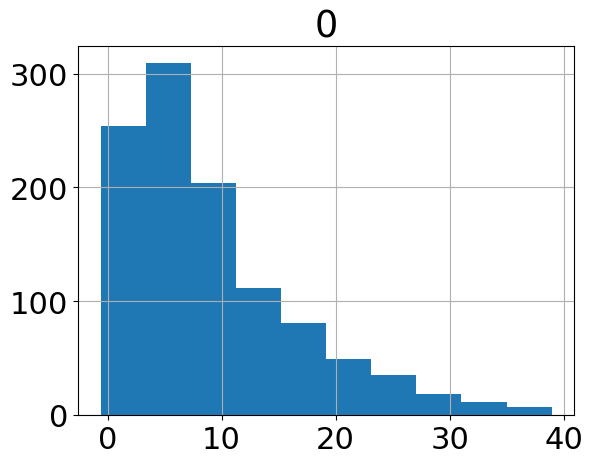

In [80]:
zScorewithNull(calculatedMI, nullMI).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

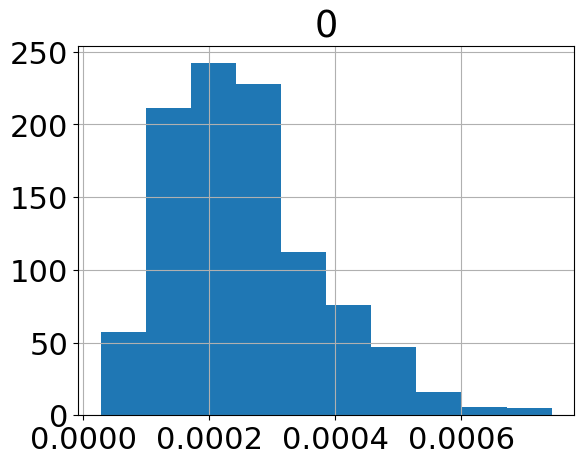

In [82]:
pd.DataFrame(nullMI).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

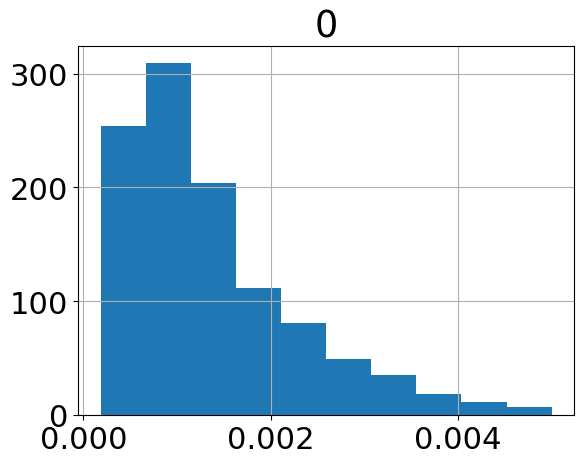

In [83]:
pd.DataFrame(calculatedMI).hist()

In [70]:
def calcMPS(allMI, nullMIScores, df, moduleDF, moduleNum = 0):
    #z scoring mutual information based off null distribution
    val = zScorewithNull(allMI, nullMIScores)

    # makes every value less than zero, zero
    val = pd.DataFrame(val.clip(lower = 0))

    for idx in range(len(val)):
        matrix = np.corrcoef(moduleDF.iloc[:,moduleNum],df.iloc[:,idx])
        if matrix[0][1] < 0:
            val.iloc[idx,0] = val.iloc[idx,0] * -1
            
    
    return val

In [71]:
myMpsScores = calcMPS(allMI = calculatedMI, nullMIScores = nullMI, df = processedGeneExp, moduleDF = moduleDF)

In [84]:
def write_dataframe_to_csv(dataframe, filename):
    import csv

    dataframe.to_csv(filename, index=False)

In [89]:
myMpsScores['Patient'] = processedGeneExp.columns

In [90]:
myMpsScores

,0,Patient
0,8.095785,TCGA-3C-AAAU-01
1,-4.300562,TCGA-3C-AALI-01
2,-4.477857,TCGA-3C-AALJ-01
3,-5.707711,TCGA-3C-AALK-01
4,-5.342083,TCGA-4H-AAAK-01
...,...,...
1077,-22.407989,TCGA-WT-AB44-01
1078,-13.464322,TCGA-XX-A899-01
1079,-12.691762,TCGA-XX-A89A-01
1080,-20.801517,TCGA-Z7-A8R5-01


In [93]:
write_dataframe_to_csv(myMpsScores, "MPSScores_cluster_99_dox")

In [94]:
dox_100_clusters

,Unnamed: 0,Cluster
0,NAT2,32
1,ADA,23
2,CDH2,44
3,AKT3,19
4,MED6,29
...,...,...
12323,SLC12A6,96
12324,PTBP3,91
12325,KCNE2,34
12326,DGCR2,72


In [98]:
write_dataframe_to_csv(binningProcessedGeneExp, "/home/ndjed/Programs/VSCode/LINCS_Project/binnedProcessedGeneExpDox")

In [104]:
len(np.intersect1d(dox_100_clusters.iloc[:,0], binningProcessedGeneExp.index))

10721

In [102]:
dox_100_clusters.iloc[:,1]

0        32
1        23
2        44
3        19
4        29
         ..
12323    96
12324    91
12325    34
12326    72
12327    25
Name: Cluster, Length: 12328, dtype: int64

In [107]:
filtBinningProcessedGeneExp = binningProcessedGeneExp[binningProcessedGeneExp.index.isin(np.intersect1d(dox_100_clusters.iloc[:,0], binningProcessedGeneExp.index))]

In [110]:
filtBinningProcessedGeneExp = filtBinningProcessedGeneExp.sort_index()

In [111]:
dox_100_clusters.index = dox_100_clusters.iloc[:,0]

In [113]:
dox_100_clusters = dox_100_clusters.sort_index()

In [117]:
dox_100_clusters = dox_100_clusters[dox_100_clusters.index.isin(np.intersect1d(dox_100_clusters.iloc[:,0], binningProcessedGeneExp.index))]

In [118]:
dox_100_clusters = dox_100_clusters.sort_index()

In [119]:
dox_100_clusters

,Unnamed: 0,Cluster
Unnamed: 0,,
A2M,A2M,86
A4GALT,A4GALT,57
A4GNT,A4GNT,34
AAAS,AAAS,98
AACS,AACS,5
...,...,...
ZWINT,ZWINT,30
ZXDB,ZXDB,87
ZYX,ZYX,42


In [123]:
filtBinningProcessedGeneExp['Cluster'] = dox_100_clusters['Cluster'].tolist()

ValueError: Length of values (10722) does not match length of index (10724)

In [124]:
binningProcessedGeneExp

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SG-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,...,TCGA-S3-A6ZH-01 bin,TCGA-S3-AA0Z-01 bin,TCGA-S3-AA10-01 bin,TCGA-S3-AA11-01 bin,TCGA-S3-AA12-01 bin,TCGA-S3-AA14-01 bin,TCGA-S3-AA15-01 bin,TCGA-S3-AA17-01 bin,TCGA-UL-AAZ6-01 bin,TCGA-UU-A93S-01 bin,TCGA-V7-A7HQ-01 bin,TCGA-W8-A86G-01 bin,TCGA-WT-AB41-01 bin,TCGA-WT-AB44-01 bin,TCGA-XX-A899-01 bin,TCGA-XX-A89A-01 bin,TCGA-Z7-A8R5-01 bin,TCGA-Z7-A8R6-01 bin
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ATAD1,-0.662434,-1.488029,-0.328360,-0.297924,-0.049180,-0.504470,0.345531,0.323199,0.984491,0.334153,-0.088562,0.277197,0.250429,0.059191,0.392385,1.994309,0.292735,-0.399410,...,5.0,4.0,8.0,1.0,6.0,4.0,1.0,3.0,4.0,6.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,1.0
MINPP1,-0.447496,-0.874246,-1.526306,-0.113252,-0.537229,-0.244729,1.483707,-0.081928,1.213660,-0.069306,-0.126465,-0.162466,0.854300,-0.004993,0.738655,0.571351,0.541036,-0.381574,...,3.0,6.0,6.0,1.0,5.0,8.0,2.0,1.0,7.0,5.0,2.0,1.0,4.0,1.0,3.0,6.0,3.0,1.0
MYEF2,1.409064,0.422713,0.183322,0.036891,0.052631,-0.120317,0.197447,1.110136,0.513236,0.425248,-1.662541,-0.741838,-0.764868,-0.832778,-0.175167,0.908211,0.670456,0.087951,...,9.0,1.0,6.0,9.0,9.0,2.0,3.0,4.0,8.0,5.0,3.0,4.0,2.0,5.0,5.0,5.0,2.0,1.0
MTMR6,0.051479,-1.082808,-0.516362,-0.030692,-0.059238,-1.006727,0.489055,0.321319,-0.114505,0.182028,-0.221786,-0.110193,0.660569,-0.619697,1.783941,2.961469,1.335162,-0.080990,...,3.0,7.0,5.0,3.0,6.0,10.0,4.0,9.0,2.0,5.0,2.0,2.0,4.0,1.0,9.0,2.0,2.0,1.0
LOC653501,0.746000,-2.827599,-2.153091,0.037181,0.301426,0.712573,0.099464,1.165514,0.409411,1.064421,0.913555,-0.235158,0.907353,-0.205440,0.348769,-0.083189,-0.195940,-0.049963,...,4.0,8.0,6.0,8.0,2.0,5.0,3.0,5.0,1.0,2.0,2.0,7.0,1.0,5.0,4.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPCS2,-0.807788,-0.930144,-0.280465,-0.057515,-0.506007,0.222872,3.366106,-1.271767,-1.095285,-0.395310,-0.338714,-0.207888,-0.488923,-0.415313,1.674086,0.289885,1.744120,0.538649,...,3.0,3.0,5.0,4.0,5.0,5.0,7.0,9.0,9.0,9.0,8.0,5.0,10.0,9.0,10.0,2.0,7.0,10.0
PPME1,-0.575271,0.555986,-0.297958,0.082052,-0.487693,-0.310234,0.690796,0.513261,0.017057,0.097898,-0.220039,-0.129512,-0.032286,0.160504,0.302601,1.188314,1.222985,0.092952,...,1.0,5.0,2.0,7.0,6.0,3.0,3.0,8.0,7.0,9.0,5.0,3.0,8.0,7.0,10.0,1.0,3.0,10.0
SPCS2P4,-1.155770,-1.220041,-0.439099,-0.193975,-0.782769,0.029020,3.366755,-1.432941,-1.072354,-0.193338,-0.378966,0.142093,-0.434074,-0.108427,1.944006,0.404915,2.055028,0.893678,...,2.0,2.0,4.0,3.0,4.0,4.0,7.0,9.0,8.0,8.0,4.0,3.0,8.0,6.0,10.0,1.0,4.0,10.0


In [132]:
# filtUniqueBinningProcessedGeneExp = binningProcessedGeneExp[binningProcessedGeneExp.index.isin(np.intersect1d(set(filtBinningProcessedGeneExp.index), filtBinningProcessedGeneExp.index))]
filtBinningProcessedGeneExp

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SG-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,...,TCGA-S3-A6ZH-01 bin,TCGA-S3-AA0Z-01 bin,TCGA-S3-AA10-01 bin,TCGA-S3-AA11-01 bin,TCGA-S3-AA12-01 bin,TCGA-S3-AA14-01 bin,TCGA-S3-AA15-01 bin,TCGA-S3-AA17-01 bin,TCGA-UL-AAZ6-01 bin,TCGA-UU-A93S-01 bin,TCGA-V7-A7HQ-01 bin,TCGA-W8-A86G-01 bin,TCGA-WT-AB41-01 bin,TCGA-WT-AB44-01 bin,TCGA-XX-A899-01 bin,TCGA-XX-A89A-01 bin,TCGA-Z7-A8R5-01 bin,TCGA-Z7-A8R6-01 bin
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A2M,-0.963554,-0.578961,-0.355763,-0.046004,-0.239156,0.123867,-1.828008,1.481309,1.071136,0.474559,0.461257,0.140334,0.306562,-0.204772,0.965629,-1.431578,-0.336315,0.007392,...,3.0,4.0,6.0,4.0,1.0,6.0,9.0,6.0,2.0,2.0,4.0,8.0,5.0,2.0,9.0,8.0,10.0,3.0
A4GALT,-1.702796,-0.641045,1.006826,0.846991,0.346150,0.446621,0.582220,0.328482,0.470535,0.026098,0.671045,1.104704,0.369749,0.032225,1.205704,-1.506205,0.173880,1.027804,...,4.0,3.0,9.0,6.0,1.0,5.0,9.0,9.0,8.0,2.0,10.0,5.0,10.0,7.0,9.0,9.0,8.0,10.0
A4GNT,4.002316,-0.021560,-0.976799,-0.976799,-0.196934,2.609813,2.409186,0.436283,0.140198,-0.976799,0.384533,0.216185,0.637934,1.013600,-0.976799,0.098365,0.819338,-0.976799,...,6.0,10.0,10.0,9.0,6.0,10.0,10.0,7.0,5.0,3.0,6.0,10.0,3.0,7.0,6.0,10.0,2.0,2.0
AAAS,-0.213853,0.825082,0.144986,0.381849,0.557221,1.064531,0.770226,0.090923,-0.904384,-0.280397,1.237603,0.124028,-0.925222,-0.351180,-1.034855,1.269384,-1.731118,-0.286153,...,7.0,5.0,5.0,9.0,10.0,9.0,6.0,7.0,10.0,3.0,10.0,10.0,10.0,10.0,5.0,8.0,9.0,9.0
AACS,0.174748,-0.395414,0.920960,-0.339626,-0.385890,-0.402621,0.385554,1.689919,-0.533720,-0.408594,-1.774781,1.172401,-0.437746,-0.131534,-0.346856,1.914383,0.645759,-0.467079,...,8.0,6.0,2.0,9.0,4.0,9.0,5.0,1.0,9.0,10.0,8.0,1.0,5.0,3.0,6.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,0.434317,0.487072,1.938938,-0.065481,-0.052327,-0.688970,1.328936,-1.167720,-0.110827,0.224817,-0.046960,-0.323968,-1.054518,1.326892,-0.762339,1.335132,-0.487462,0.019627,...,10.0,9.0,9.0,5.0,7.0,5.0,6.0,8.0,6.0,9.0,2.0,1.0,4.0,1.0,2.0,5.0,1.0,10.0
ZXDB,1.357044,-0.279104,0.072935,-0.328701,-0.391874,0.449938,-1.187363,0.017031,0.233946,0.695537,0.070527,-0.384133,0.243757,-0.665422,3.374501,0.342369,0.118172,-1.465828,...,5.0,2.0,4.0,5.0,6.0,7.0,1.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,7.0,2.0,1.0,3.0
ZYX,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,0.869147,-0.368676,0.915187,0.524242,-0.291272,-3.637316,0.548940,-0.376884,...,3.0,2.0,7.0,3.0,5.0,8.0,9.0,5.0,7.0,9.0,8.0,9.0,9.0,10.0,8.0,9.0,9.0,6.0


In [133]:
dox_100_clusters

,Unnamed: 0,Cluster
Unnamed: 0,,
A2M,A2M,86
A4GALT,A4GALT,57
A4GNT,A4GNT,34
AAAS,AAAS,98
AACS,AACS,5
...,...,...
ZWINT,ZWINT,30
ZXDB,ZXDB,87
ZYX,ZYX,42


In [138]:
count = 1
for i in range(len(filtBinningProcessedGeneExp.index.tolist())):
    count+=1
    if count == len(filtBinningProcessedGeneExp):
        break
    if filtBinningProcessedGeneExp.index.tolist()[i] == filtBinningProcessedGeneExp.index.tolist()[i+1]:
        print(i)
        print(filtBinningProcessedGeneExp.index.tolist()[i])
        
    
    

3222
FGF13
7490
QSOX1
9568
TMEM8B


In [142]:
filtBinningProcessedGeneExp.loc["TMEM8B"]

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SG-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,...,TCGA-S3-A6ZH-01 bin,TCGA-S3-AA0Z-01 bin,TCGA-S3-AA10-01 bin,TCGA-S3-AA11-01 bin,TCGA-S3-AA12-01 bin,TCGA-S3-AA14-01 bin,TCGA-S3-AA15-01 bin,TCGA-S3-AA17-01 bin,TCGA-UL-AAZ6-01 bin,TCGA-UU-A93S-01 bin,TCGA-V7-A7HQ-01 bin,TCGA-W8-A86G-01 bin,TCGA-WT-AB41-01 bin,TCGA-WT-AB44-01 bin,TCGA-XX-A899-01 bin,TCGA-XX-A89A-01 bin,TCGA-Z7-A8R5-01 bin,TCGA-Z7-A8R6-01 bin
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TMEM8B,-0.086863,-0.541038,-0.380659,0.315705,0.828075,0.903746,0.242477,1.276877,0.699028,0.497386,1.339171,0.684620,0.518062,0.276319,-0.572739,-2.104748,-0.913899,-0.071667,...,3.0,9.0,1.0,9.0,10.0,3.0,3.0,9.0,5.0,6.0,9.0,10.0,10.0,8.0,2.0,10.0,7.0,8.0
TMEM8B,1.761950,1.793628,0.830421,0.254129,-0.832552,1.117311,-1.109733,0.755188,-0.242832,0.576942,0.323302,-0.140633,-0.947006,-0.090329,-1.278155,-0.631298,-1.282695,0.362172,...,5.0,10.0,2.0,10.0,10.0,5.0,3.0,2.0,8.0,8.0,6.0,10.0,8.0,6.0,2.0,6.0,2.0,8.0


In [144]:
filtBinningProcessedGeneExp = filtBinningProcessedGeneExp[~filtBinningProcessedGeneExp.index.duplicated(keep='first')]
filtBinningProcessedGeneExp

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,TCGA-A1-A0SF-01,TCGA-A1-A0SG-01,TCGA-A1-A0SH-01,TCGA-A1-A0SI-01,TCGA-A1-A0SJ-01,TCGA-A1-A0SK-01,TCGA-A1-A0SM-01,TCGA-A1-A0SN-01,...,TCGA-S3-A6ZH-01 bin,TCGA-S3-AA0Z-01 bin,TCGA-S3-AA10-01 bin,TCGA-S3-AA11-01 bin,TCGA-S3-AA12-01 bin,TCGA-S3-AA14-01 bin,TCGA-S3-AA15-01 bin,TCGA-S3-AA17-01 bin,TCGA-UL-AAZ6-01 bin,TCGA-UU-A93S-01 bin,TCGA-V7-A7HQ-01 bin,TCGA-W8-A86G-01 bin,TCGA-WT-AB41-01 bin,TCGA-WT-AB44-01 bin,TCGA-XX-A899-01 bin,TCGA-XX-A89A-01 bin,TCGA-Z7-A8R5-01 bin,TCGA-Z7-A8R6-01 bin
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A2M,-0.963554,-0.578961,-0.355763,-0.046004,-0.239156,0.123867,-1.828008,1.481309,1.071136,0.474559,0.461257,0.140334,0.306562,-0.204772,0.965629,-1.431578,-0.336315,0.007392,...,3.0,4.0,6.0,4.0,1.0,6.0,9.0,6.0,2.0,2.0,4.0,8.0,5.0,2.0,9.0,8.0,10.0,3.0
A4GALT,-1.702796,-0.641045,1.006826,0.846991,0.346150,0.446621,0.582220,0.328482,0.470535,0.026098,0.671045,1.104704,0.369749,0.032225,1.205704,-1.506205,0.173880,1.027804,...,4.0,3.0,9.0,6.0,1.0,5.0,9.0,9.0,8.0,2.0,10.0,5.0,10.0,7.0,9.0,9.0,8.0,10.0
A4GNT,4.002316,-0.021560,-0.976799,-0.976799,-0.196934,2.609813,2.409186,0.436283,0.140198,-0.976799,0.384533,0.216185,0.637934,1.013600,-0.976799,0.098365,0.819338,-0.976799,...,6.0,10.0,10.0,9.0,6.0,10.0,10.0,7.0,5.0,3.0,6.0,10.0,3.0,7.0,6.0,10.0,2.0,2.0
AAAS,-0.213853,0.825082,0.144986,0.381849,0.557221,1.064531,0.770226,0.090923,-0.904384,-0.280397,1.237603,0.124028,-0.925222,-0.351180,-1.034855,1.269384,-1.731118,-0.286153,...,7.0,5.0,5.0,9.0,10.0,9.0,6.0,7.0,10.0,3.0,10.0,10.0,10.0,10.0,5.0,8.0,9.0,9.0
AACS,0.174748,-0.395414,0.920960,-0.339626,-0.385890,-0.402621,0.385554,1.689919,-0.533720,-0.408594,-1.774781,1.172401,-0.437746,-0.131534,-0.346856,1.914383,0.645759,-0.467079,...,8.0,6.0,2.0,9.0,4.0,9.0,5.0,1.0,9.0,10.0,8.0,1.0,5.0,3.0,6.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,0.434317,0.487072,1.938938,-0.065481,-0.052327,-0.688970,1.328936,-1.167720,-0.110827,0.224817,-0.046960,-0.323968,-1.054518,1.326892,-0.762339,1.335132,-0.487462,0.019627,...,10.0,9.0,9.0,5.0,7.0,5.0,6.0,8.0,6.0,9.0,2.0,1.0,4.0,1.0,2.0,5.0,1.0,10.0
ZXDB,1.357044,-0.279104,0.072935,-0.328701,-0.391874,0.449938,-1.187363,0.017031,0.233946,0.695537,0.070527,-0.384133,0.243757,-0.665422,3.374501,0.342369,0.118172,-1.465828,...,5.0,2.0,4.0,5.0,6.0,7.0,1.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,7.0,2.0,1.0,3.0
ZYX,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,0.869147,-0.368676,0.915187,0.524242,-0.291272,-3.637316,0.548940,-0.376884,...,3.0,2.0,7.0,3.0,5.0,8.0,9.0,5.0,7.0,9.0,8.0,9.0,9.0,10.0,8.0,9.0,9.0,6.0


In [146]:
dox_100_clusters = dox_100_clusters[~dox_100_clusters.index.duplicated(keep = 'first')]
dox_100_clusters

,Unnamed: 0,Cluster
Unnamed: 0,,
A2M,A2M,86
A4GALT,A4GALT,57
A4GNT,A4GNT,34
AAAS,AAAS,98
AACS,AACS,5
...,...,...
ZWINT,ZWINT,30
ZXDB,ZXDB,87
ZYX,ZYX,42


In [148]:
filtBinningProcessedGeneExp['Clusters'] = dox_100_clusters['Cluster']

In [149]:
filtBinningProcessedGeneExp['Clusters']

Hugo_Symbol
A2M       86
A4GALT    57
A4GNT     34
AAAS      98
AACS       5
          ..
ZWINT     30
ZXDB      87
ZYX       42
ZZEF1      9
ZZZ3       6
Name: Clusters, Length: 10721, dtype: int64

In [ ]:
# ready to do mutual information